## Spring 2019 Observing Proposals ##

* KPNO survey
* KPNO regular
* INT 

make this proposal about CO sample

In [63]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u

virgo_redshift = 0.0036 # from NED
dist_mod = 5.*np.log10(virgo_redshift*3.e5/70.*1.e6)-5

In [82]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
nsafile=tablepath+'nsa.virgo.fits'
nsa=fits.getdata(nsafile)
# read in WISE catalog
wisefile=tablepath+'nsa_wise.virgo.fits'
wise=fits.getdata(wisefile)
# read in John's stellar masses
massfile=tablepath+'nsa_mstar.virgo.fits'
jmass=fits.getdata(massfile)
nsaco = fits.getdata(tablepath+'nsa_CO-Gianluca.virgo.fits')
nsacoflag = (nsaco.CO == 'L') | (nsaco.CO == 'O')
nsadict=dict((a,b) for a,b in zip(nsa.NSAID,np.arange(len(nsa.NSAID))))





775
6044


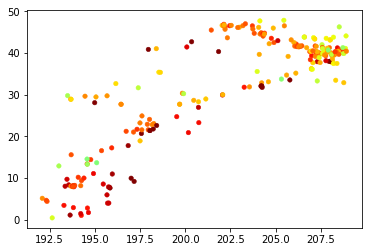

In [154]:
# NGC5353/4 Filament
radec = (nsa.RA > 192.) & (nsa.RA < 209) & (nsa.DEC > 0.) & (nsa.DEC < 50.) 
radec_flag = radec & (nsa.DEC >(2*(nsa.RA - 205.) + 20) ) & (nsa.DEC < (2*(nsa.RA - 205.) + 55))
filament = radec_flag & (nsa.Z*3.e5 >2000.) & (nsa.Z*3.e5 < 3238.)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=nsa.Z[filament]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5,cmap='jet')
xl = np.linspace(196,230,100)
yl = (2*(xl - 205.) + 20)
#plt.plot(xl,yl,'r-')
NGCfilament = filament

# Kim Canes Venatici Filament
radec_vflag = (nsa.DEC >= 30.) * (nsa.DEC < 45.) * (nsa.RA > 190) & (nsa.RA < 204) 
filament3 = radec_vflag * (nsa.Z*3.e5 >=  1100) *  (nsa.Z*3.e5 <= 1400)
#plt.scatter(nsa.RA[filament3],nsa.DEC[filament3],c=nsa.Z[filament3]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=.5)
CVfilament = filament3

# filament 3 - this does not correspond to one of the filaments in Kim+2016
radec_vflag = (nsa.DEC >= 25.) * (nsa.RA < 185) * (nsa.DEC > -0.8 * nsa.RA + 170.) 
filament3 = radec_vflag * (nsa.Z*3.e5 >=  1500) *  (nsa.Z*3.e5 <= 2300)
#plt.scatter(nsa.RA[filament3],nsa.DEC[filament3],c=nsa.Z[filament3]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=.5)


# filament - Leo Filaments
radec_vflag = (nsa.DEC >= 18.) * (nsa.RA < 185.) * (nsa.DEC <= -0.8 * nsa.RA + 170.) 
filament4 = radec_vflag * (nsa.Z*3.e5 >=  1400) *  (nsa.Z*3.e5 <= 2300)
#plt.scatter(nsa.RA[filament4],nsa.DEC[filament4],c=nsa.Z[filament4]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5,cmap='jet')

LEOfilament = filament4
# Virgo III Filament
radec_vflag = (nsa.RA < 232.) & (nsa.RA > 203)& (nsa.DEC >= 0.) & (nsa.DEC < 9.) 
radec = radec_vflag & (nsa.DEC < (-.2*(nsa.RA - 220.) + 7))
filament4 = radec & (nsa.Z*3.e5 >=  1200) &  (nsa.Z*3.e5 <= 2190)
#plt.scatter(nsa.RA[filament4],nsa.DEC[filament4],c=nsa.Z[filament4]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(190,230,100)
yl = (-.2*(xl - 220.) + 7)
#plt.plot(xl,yl,'r-')
V3filament = filament4

#allfilaments = NGCfilament | CVfilament | LEOfilament | V3filament

allfilaments = NGCfilament | CVfilament  | V3filament | LEOfilament
allfilaments_masscut = allfilaments & (jmass.MSTAR_50 > 8.5)
halphafilaments = NGCfilament | LEOfilament #&  (jmass.MSTAR_50 > 8.)
print sum(allfilaments)
print len(nsa.RA)

In [83]:
ha = fits.getdata('/Users/rfinn/github/Virgo/tables/nsa_Halpha.virgo.fits')
haflag = ha['halpha'] == 1
print(sum(haflag))

39


In [84]:
co = fits.getdata('/Users/rfinn/github/Virgo/tables/CO-MasterFile-2018Feb16.fits')


In [101]:
# match CO catalog to NSA
nsacat = SkyCoord(nsa.RA*u.degree,nsa.DEC*u.degree,frame='icrs')
COcat = SkyCoord(co.RA*u.degree,co.DEC*u.degree,frame='icrs')
index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)
# only keep matches with matched RA and Dec w/in 10 arcsec
COflag = dist2d.degree < 10./3600# keep sources with matches w/in 10 arcsec
matchedCO10=np.zeros(len(nsa),dtype=co.dtype)
matchedCO10[COflag] = co[index[COflag]]
print len(COflag), sum(COflag)
codetect_flag = matchedCO10['CO_DETECT'] ==1

print('number of CO detections with halpha obs = ',np.sum(haflag & nsacoflag))


6044 227
('number of CO detections with halpha obs = ', 27)


CO sample is 227 galaxies.

we observed 24 CO galaxies in 8 clear nights.  to do 200, 





In [6]:
# number of nights required to finish CO sample
print 'Nights remaining = %.1f'%(200.*8/24)
print 'Nights per year = %.1f'%(200.*8/24/3.)


Nights remaining = 66.7
Nights per year = 22.2


In [7]:
sum(nsaco.CO == 'O')


154

CO sample selection

## Plot positions of all CO Sources ##


make two plots.  One showing filaments.  One showing CO and those already detected by Halpha.



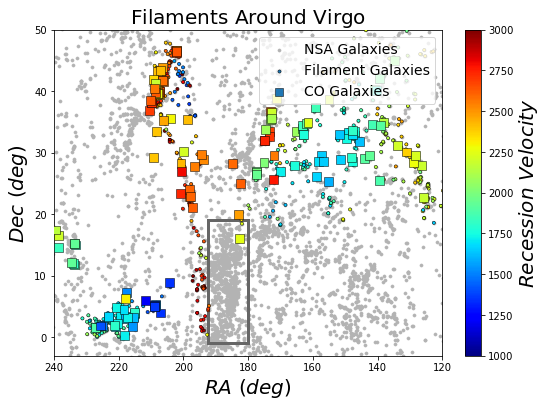

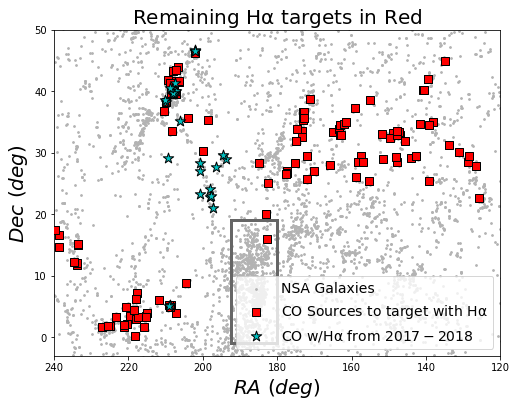

In [171]:
fig = plt.figure(figsize=(8,6))

plt.scatter(nsa.RA,nsa.DEC,c='0.7',marker='o',s=10,lw=0.5,vmin=1000,vmax=3000,cmap='jet',zorder=1,label='NSA Galaxies')

flag =  allfilaments
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=nsa.ZDIST[flag]*3.e5,marker='o',s=10,lw=0.5,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k',label='Filament Galaxies')

flag = codetect_flag
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=nsa.ZDIST[flag]*3.e5,s=80,lw=0.5,marker='s',vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k',label='CO Galaxies')

#flag = codetect_flag & ~haflag
#plt.scatter(nsa.RA[flag],nsa.DEC[flag],c='r',s=80,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k'
#    ,label='CO Sources')
#flag = codetect_flag & haflag
#plt.scatter(nsa.RA[flag],nsa.DEC[flag],marker='*',c='c',s=120,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k'
#    ,label=r'$\rm CO \ w/H\alpha \ from  \ 2017-2018$')

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.ylim(-3,65)
plt.axis([120,240,-3,50])
plt.gca().invert_xaxis()
plt.legend(loc='upper right',fontsize=14)
# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20
plt.axis
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3,zorder=1)
fig.gca().add_artist(rect)
plt.title(r'$\rm Filaments \ Around \ Virgo $',fontsize=20)
#cb=plt.colorbar(fraction=.08)
plt.savefig('../plots/noao-2019-fig1a.eps')


fig = plt.figure(figsize=(8,6))

plt.scatter(nsa.RA,nsa.DEC,c='0.7',s=3,label='NSA Galaxies')

flag = codetect_flag & ~haflag
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c='r',marker='s',s=80,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k'
    ,label=r'$\rm CO \ Sources \ to  \ target \ with \ H\alpha$')
flag = codetect_flag & haflag
plt.scatter(nsa.RA[flag],nsa.DEC[flag],marker='*',c='c',s=120,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k'
    ,label=r'$\rm CO \ w/H\alpha \ from  \ 2017-2018$')

#cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.ylim(-3,65)
plt.axis([120,240,-3,50])
plt.gca().invert_xaxis()
plt.legend(loc='lower right',fontsize=14)
# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20

rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3,zorder=1)
fig.gca().add_artist(rect)
plt.title(r'$\rm Remaining \ H\alpha \ targets \ in \ Red$',fontsize=20)
#cb=plt.colorbar(fraction=.08)
plt.savefig('../plots/noao-2019-fig1b.eps')

## CO galaxies that don't yet have H-alpha ##

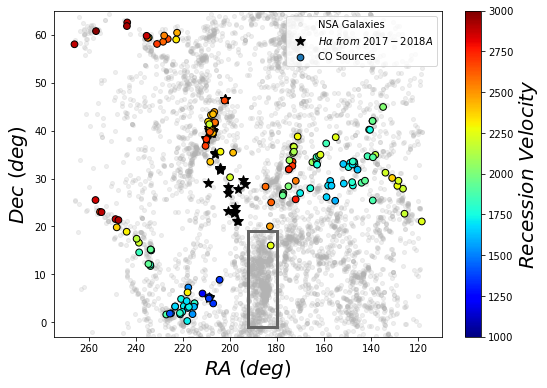

In [100]:
fig = plt.figure(figsize=(8,6))

plt.plot(nsa.RA,nsa.DEC,'ko',c='0.7',markersize=4,alpha=0.2,zorder=1, label='NSA Galaxies')

flag = codetect_flag & ~haflag
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=nsa.ZDIST[flag]*3.e5,s=45,vmin=1000,vmax=3000,cmap='jet',zorder=3,edgecolors='k'
    ,label='CO Sources')
plt.gca().invert_xaxis()
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.ylim(-3,65)
plt.plot(nsa.RA[haflag],nsa.DEC[haflag],'k*',markersize=10,label=r'$H\alpha \ from \ 2017-2018A$' )
plt.legend(loc='upper right')
# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
#cb=plt.colorbar(fraction=.08)


plt.savefig('../plots/noao-2019-fig1b.eps')



## Redo Figure 1 ##

repeat left panel, with CO sources colored by stellar mass

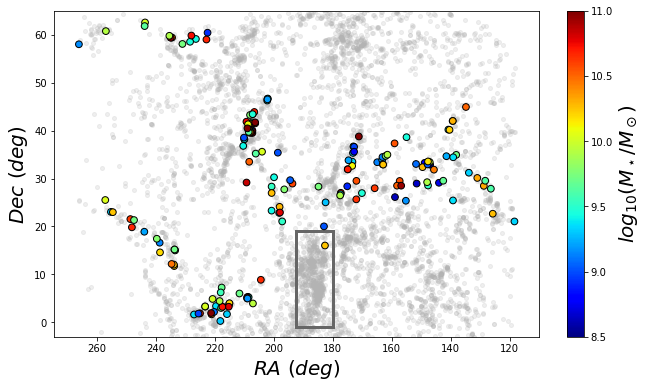

In [78]:
fig = plt.figure(figsize=(10,6))

plt.plot(nsa.RA,nsa.DEC,'ko',c='0.7',markersize=4,alpha=0.2,zorder=1)

plt.scatter(nsa.RA[codetect_flag],nsa.DEC[codetect_flag],c=jmass.MSTAR_50[codetect_flag],s=45,vmin=8.5,vmax=11,cmap='jet',zorder=3,edgecolors='k')
plt.gca().invert_xaxis()
cb=plt.colorbar(fraction=.08)
cb.set_label('$log_{10}(M_\star/M_\odot)$',size=20)
#plt.axis('equal')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.ylim(-3,65)


## Plot NUV-r versus stellar mass ##

which galaxies are we targeting with H$\alpha$

30.9416285774


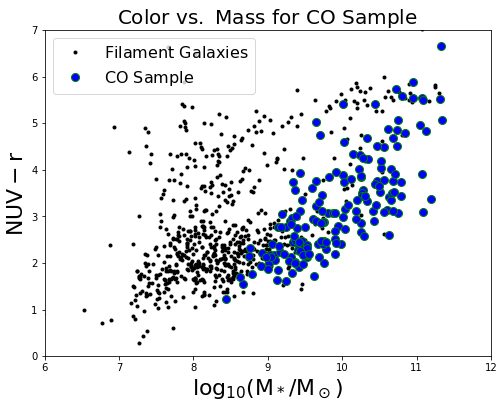

In [200]:
Halphasampleflag = allfilaments & (jmass.MSTAR_50 >= 8.5) #& (jmass.MSTAR < 10)
wiseflag = (wise.W4MPRO > 0.1) & (wise.W3SNR > 3.)
WISEsampleflag = halphafilaments & wiseflag


# plot NUV-r vs M_r for filament galaxies
NUVr=nsa.ABSMAG[:,1] - nsa.ABSMAG[:,4]
Mr = nsa.ABSMAG[:,4]
x = jmass.MSTAR_50
m22_AB = (wise.W4MPRO + 6.620)
r22 = Mr - (m22_AB - dist_mod)
print dist_mod
plt.figure(figsize=(11,5))
filamentflag = allfilaments
titles=['$NGC5353 \ Filament$', '$Leo \ Filaments$']
hexflag = (x > 6) & (x < 12) & (NUVr > 0) & (NUVr < 7)
plt.figure(figsize=(8,6))
#plt.hexbin(x[hexflag],NUVr[hexflag],gridsize=100,cmap='gray_r',label='All NSA')
flag = allfilaments
plt.plot(x[flag],NUVr[flag],'k.',label=r'$\rm Filament \ Galaxies$')
flag = codetect_flag 
plt.plot(x[flag],NUVr[flag],'ko',mfc='b',mec='g',markersize=8,label=r'$ \rm CO \ Sample$')
#flag = WISEsampleflag
#plt.plot(x[flag],NUVr[flag],'ro',mfc='None',mec='r',markersize=8,label='$WISE \ 12\mu m$')
#flag = Halphasampleflag
#plt.plot(x[flag],NUVr[flag],'bo',mfc='b',mec='b',markersize=3,label='$Halpha$',alpha=.3)

plt.legend(loc='upper left',numpoints=1,fontsize=16)
#flag = allfilaments & COflag & ~COdetection
#plt.plot(x[flag],NUVr[flag],'gs',markersize=10,mfc='None')
#flag = allfilaments & COflag & COdetection
#plt.plot(x[flag],NUVr[flag],'gs',markersize=10,mfc='None',mec='r')

plt.ylabel(r'$\rm NUV - r$',fontsize=22)
plt.xlabel(r'$\rm log_{10}(M_*/M_\odot)$',fontsize=22)
plt.title(r'$\rm Color\ vs. \ Mass \ for \ CO \ Sample$',fontsize=20)
plt.axis([6,12,0,7])
plt.savefig('/Users/rfinn/github/Virgo/plots/sample.eps')

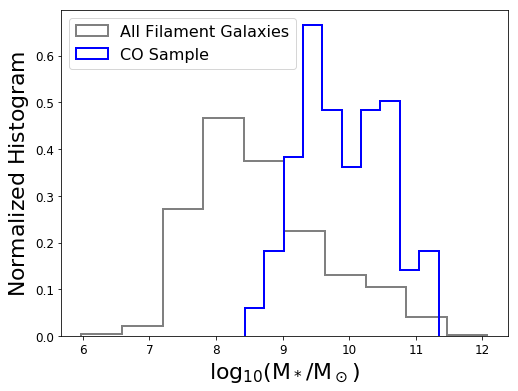

In [219]:
plt.figure(figsize=(8,6))
flag = allfilaments 
plt.hist(jmass.MSTAR_50[flag],histtype='step',lw=2,color='0.5',label='All Filament Galaxies',normed=True)
flag = codetect_flag 
plt.hist(jmass.MSTAR_50[flag],histtype='step',lw=2,color='b',label='CO Sample',normed=True)
plt.legend(loc='upper left',fontsize=16)
plt.ylabel(r'$\rm Normalized \ Histogram $',fontsize=22)
plt.xlabel(r'$\rm log_{10}(M_*/M_\odot)$',fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/Users/rfinn/github/Virgo/plots/masshist.eps')

number of sources for 2018 =  42


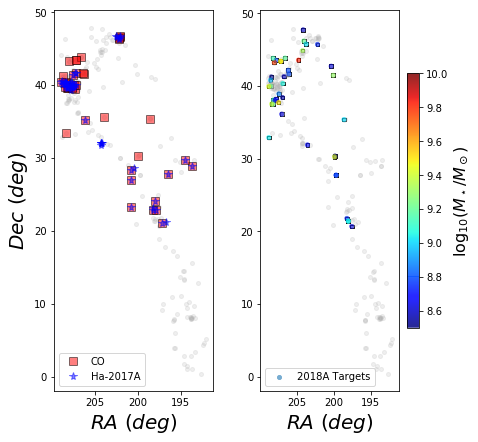

In [74]:

# NGC5353/4 Filament
radec = (nsa.RA > 192.) & (nsa.RA < 209) & (nsa.DEC > 0.) & (nsa.DEC < 50.) 
radec_flag = radec & (nsa.DEC >(2*(nsa.RA - 205.) + 20) ) & (nsa.DEC < (2*(nsa.RA - 205.) + 55))
filament = radec_flag & (nsa.Z*3.e5 >2000.) & (nsa.Z*3.e5 < 3238.)
#plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=nsa.Z[filament]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(196,230,100)
yl = (2*(xl - 205.) + 20)
#plt.plot(xl,yl,'r-')
NGCfilament = filament

fig = plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=.2,wspace=.3,right=.85)
plt.subplot(1,2,1)

plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
#plt.axis([190,212,18,53])
plt.gca().invert_xaxis()
flag = NGCfilament & codetect_flag
plt.plot(nsa.RA[flag],nsa.DEC[flag],'rs',mfc=None,mec='k',markersize=8,alpha=0.5,label='CO')
plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.5,label='Ha-2017A')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
plt.subplot(1,2,2)
plt.plot(nsa.RA[NGCfilament],nsa.DEC[NGCfilament],'ko',c='0.7',markersize=4,alpha=0.2)
#plt.axis([204,212,39,41])
#plt.axis([190,212,18,53])
plt.gca().invert_xaxis()
#plt.plot(nsa.RA[NGCfilament & COflag],nsa.DEC[NGCfilament & COflag],'rs',mfc=None,mec='r',markersize=8,alpha=0.2,label='CO')
#plt.plot(nsa.RA[NGCfilament & ha_flag],nsa.DEC[NGCfilament & ha_flag],'b*',mfc=None,mec='b',markersize=8,alpha=0.2,label='Ha')
plt.xlabel('$RA  \ (deg)$',fontsize=20)
#plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.legend(numpoints=1)
flag = NGCfilament & (jmass.MSTAR_50 > 8.5) & (jmass.MSTAR_50 < 10) & ~ha_flag & (nsa.SERSIC_BA > .25) & (nsa.DEC > 20)
print 'number of sources for 2018 = ',sum(flag)
plt.scatter(nsa.RA[flag],nsa.DEC[flag],c=jmass.MSTAR_50[flag],zorder=20,s=20,vmin=8.5,vmax=10,lw=0.5,alpha=.6,label='2018A Targets',cmap='jet')
cb=plt.colorbar(fraction=.08)
ra = nsa.RA[flag]
dec = nsa.DEC[flag]
for i in range(len(ra)):
    rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    #rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    fig.gca().add_artist(rect)
plt.legend(numpoints=1,scatterpoints=1)
cb.set_label('$\log_{10}(M_\star/M_\odot)$',size=16)
plt.savefig('/Users/rfinn/proposals/observing/NOAO2018A/noao2018a-targets.eps')

In [62]:
nsa.NSAID[matchedCO10['NED_name'] == 'NGC2964']

array([136042], dtype=int32)

## Comparison of CLU sensitivity ##

In [170]:
np.sqrt((36./48)**2*90)

7.1151247353788536

In [174]:
kpno = 3.e-17
snr_kpno = 5

clu = 7.e-15

clu_estimate = kpno*np.pi*1.5**2*(np.sqrt(((48./36)**2)/90))
print clu_estimate

2.98037647974e-17
